In [6]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

In [7]:
sns.set_style("whitegrid")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [8]:
k = '3'
file_path = f"dQ/dQ_{k}.csv"

In [9]:
df = pd.read_csv(file_path) 

In [10]:
df

,node_id,party,community,min_dQ,max_dQ
0,0,AWS,0,5.203942,5.203942
1,1,KPN-OP,0,3.667501,3.667501
2,4,AWS,0,6.667857,6.667857
3,5,AWS,0,6.639529,6.639529
4,6,SKL,0,5.637174,5.637174
...,...,...,...,...,...
455,449,SLD,1,5.612366,5.612366
456,450,SLD,1,7.756188,7.756188
457,454,PSL,1,2.206047,2.206047
458,456,SLD,1,4.987781,4.987781


In [21]:
gov = ['AWS', 'UW']
df['if_gov'] = df['party'].isin(gov)

In [27]:
def polarization(df, col='max_dQ'):
    """polarization = |median(dQ(gov)| + |median(dQ(opp)|"""
    return df.groupby('if_gov', as_index=False)[col].median()[col].sum()  # returns value

In [28]:
polarization(df)

13.043259929107485

In [29]:
def Q1(x):
    return x.quantile(0.25)

def Q3(x):
    return x.quantile(0.75)

def cohesion(df, col='max_dQ'):
    coh_df = df.groupby('if_gov', as_index=False)[col].agg([Q1, Q3])
    coh_df['IQR'] = coh_df['Q3'] - coh_df['Q1']
    coh_df['cohesion'] = 1 / coh_df['IQR']
    return coh_df  # returns df

In [30]:
cohesion(df)

,if_gov,Q1,Q3,IQR
0,False,4.397862,8.079755,3.681892
1,True,3.872119,6.644950,2.772831


# Safety zone

In [91]:
def safety_zone_dQ(df, col, stab_min=230):
    a = df[df['if_gov']][col]
    a = np.sort(a)
    safe_zone = a[:(len(a) - stab_min)][-1] if a.size > stab_min else 0
    return safe_zone

In [96]:
safety_zone = safety_zone_dQ(df, 'max_dQ', stab_min=130)

In [97]:
safety_zone

4.327600879898141

Text(0, 0.5, 'Noumber of deputies')

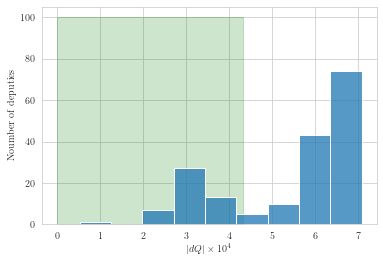

In [101]:
y_max = 100
plt.fill_betweenx([0, y_max], safe_zone, alpha=0.2, color='g')
sns.histplot(data=df[df['if_gov']], x='max_dQ')
plt.xlabel(r'$|dQ| \times 10^4$')
plt.ylabel('Number of deputies')

Text(0, 0.5, 'Number of deputies')

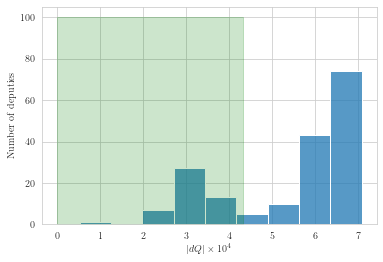

In [103]:
sns.histplot(data=df[df['if_gov']], x='max_dQ')
plt.fill_betweenx([0, y_max], safe_zone, alpha=0.2, color='g')
plt.xlabel(r'$|dQ| \times 10^4$')
plt.ylabel('Number of deputies')

Text(0, 0.5, 'Proportion of deputies')

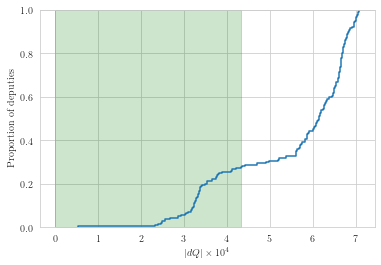

In [102]:
sns.ecdfplot(data=df[df['if_gov']], x='max_dQ')
plt.fill_betweenx([0, 1], safe_zone, alpha=0.2, color='g')

plt.xlabel(r'$|dQ| \times 10^4$')
plt.ylabel('Proportion of deputies')

# Split up of of goverment coalittion

In [118]:
s = df[df['if_gov']]['max_dQ']
s.quantile(np.linspace(0, 1, 101))

0.00    0.524021
0.01    2.390527
0.02    2.480364
0.03    2.548195
0.04    2.714645
          ...   
0.96    7.002247
0.97    7.013290
0.98    7.031012
0.99    7.046108
1.00    7.079286
Name: max_dQ, Length: 101, dtype: float64

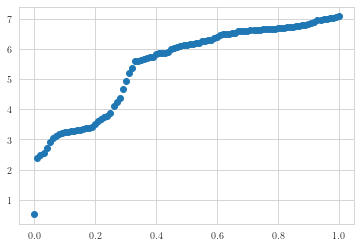

In [120]:
plt.scatter(np.linspace(0, 1, 101), s.quantile(np.linspace(0, 1, 101)))

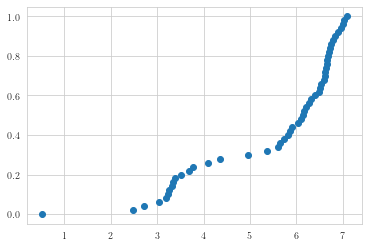

In [122]:
plt.scatter(s.quantile(np.linspace(0, 1, 51)), np.linspace(0, 1, 51))